# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [302]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [303]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [304]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [305]:
# Create a Beautiful Soup Object
html_html=browser.html
html_html

soup = BeautifulSoup(html_html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [306]:
# Find the table
table = soup.find('table')

# Extract all rows from the table
rows = table.find_all('tr')

# Create a list to store the data
data = []

# Loop through each row
for row in rows:
    # Find all the cells in the row (td or th)
    cells = row.find_all(['td', 'th'])
    # Extract the text from each cell and add it to a list
    row_data = [cell.text for cell in cells]
    # Add the row data to the list
    data.append(row_data)

# Print the extracted data
for row in data:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [307]:
# Create an empty list
data_list = []


# Loop through the scraped data to create a list of rows
for row in data:
    data_list.append(row) 
for row in data_list:
    print(row)  

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

In [308]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
data_rows = data
column_names = data_rows[0]  # First row contains the column names
data = data_rows[1:]         # The rest are the data

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=column_names)

In [309]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [310]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [311]:
# Separate the headers from the data
column_names = data_rows[0]  # First row is the header
data = data_rows[1:]         # Remaining rows are the data

# Create the DataFrame
df = pd.DataFrame(data, columns=column_names)

# Confirm the DataFrame is created successfully
print(df)

# Change data types for data analysis
df['id'] = pd.to_numeric(df['id'], errors='coerce')         # Convert to integer
df['sol'] = pd.to_numeric(df['sol'], errors='coerce')       # Convert to integer
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')  # Convert to float
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')  # Convert to float
df['ls'] = pd.to_numeric(df['ls'], errors='coerce')         # Convert to integer
df['month'] = pd.to_numeric(df['month'], errors='coerce')     # Convert to integer
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')  # Convert to datetime

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [312]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [313]:
# 1. How many months are there on Mars?
unique_months = df['month'].unique()
print("Unique months on Mars:", unique_months)

# Count the number of unique months
num_unique_months = df['month'].nunique()
print("Number of unique months on Mars:", num_unique_months)


Unique months on Mars: [ 6  7  8  9 10 11 12  1  2  3  4  5]
Number of unique months on Mars: 12


In [314]:
# Check the unique values in the 'month' column
unique_months = df['month'].unique()
print("Unique months on Mars:", unique_months)

# Count the number of unique months
num_unique_months = df['month'].nunique()
print("Number of unique months on Mars:", num_unique_months)



Unique months on Mars: [ 6  7  8  9 10 11 12  1  2  3  4  5]
Number of unique months on Mars: 12


In [315]:
# 3. What is the average minimum temperature by month?
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Calculate the average minimum temperature by month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the result
print(average_min_temp_by_month)



month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


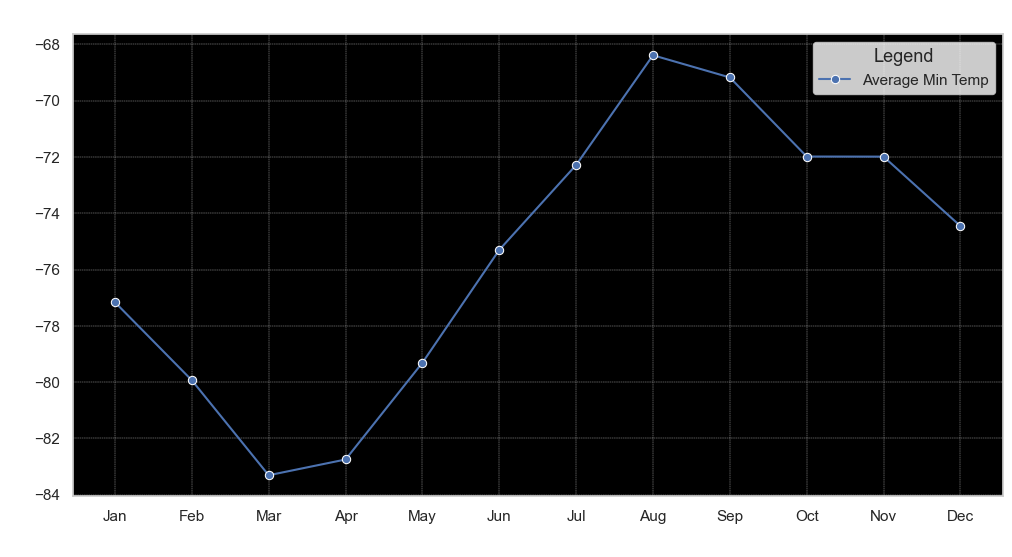

In [316]:
# Calculate the average minimum temperature by month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create the plot
ax = sns.lineplot(data=average_min_temp_by_month, x='month', y='min_temp', marker='o')

# Customizing the plot
ax.set_title('Average Minimum Temperature on Mars by Month', fontsize=16, weight='bold', color='white')
ax.set_xlabel('Month', fontsize=14, color='white')
ax.set_ylabel('Average Minimum Temperature (°C)', fontsize=14, color='white')
ax.set_xticks(range(1, 13))  # Assuming months are from 1 to 12
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_facecolor('black')
ax.grid(True, which='both', linestyle='--', linewidth=0.3)

# Add a legend with label
ax.legend(['Average Min Temp'], title='Legend', title_fontsize='13', fontsize='11')

# Show plot
plt.show()



In [317]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp_by_month = average_min_temp_by_month.sort_values(by='min_temp')

# Identify the coldest and hottest months
coldest_month = sorted_avg_temp_by_month.iloc[0]
hottest_month = sorted_avg_temp_by_month.iloc[-1]

# Display the results
print("Coldest Month:")
print(coldest_month)

print("\nHottest Month:")
print(hottest_month)

Coldest Month:
month        3.000000
min_temp   -83.307292
Name: 2, dtype: float64

Hottest Month:
month        8.000000
min_temp   -68.382979
Name: 7, dtype: float64


In [318]:
# 4. What is the average pressure by month?
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Calculate the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean().reset_index()

# Display the result
print(average_pressure_by_month)


    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


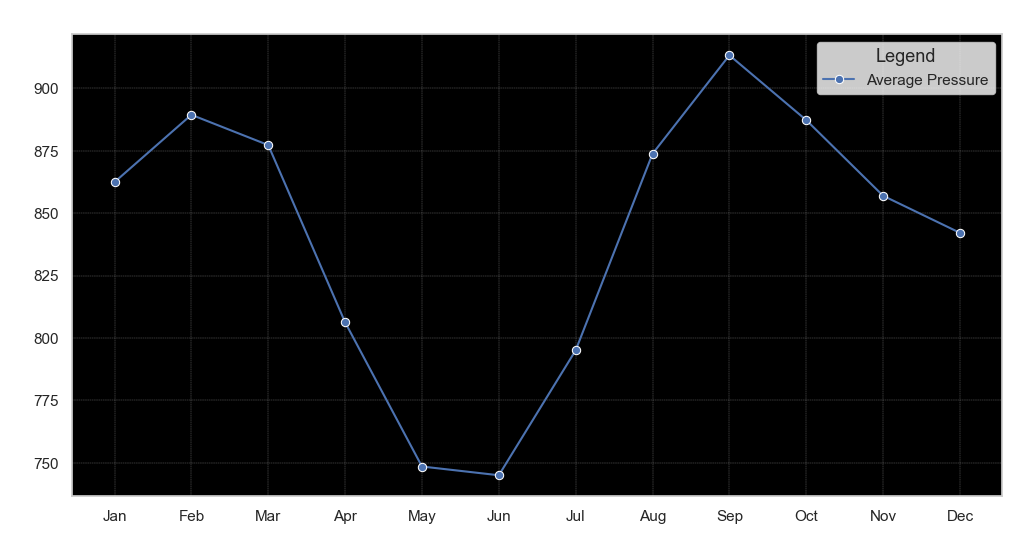

In [319]:
# Plot the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a space-themed color palette
space_palette = sns.color_palette("dark:#5A3A5B", as_cmap=True)

# Create the plot
ax = sns.lineplot(data=average_pressure_by_month, x='month', y='pressure', marker='o')

# Customizing the plot
ax.set_title('Average Pressure on Mars by Month', fontsize=16, weight='bold', color='white')
ax.set_xlabel('Month', fontsize=14, color='white')
ax.set_ylabel('Average Pressure (Pa)', fontsize=14, color='white')
ax.set_xticks(range(1, 13))  # Assuming months are from 1 to 12
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_facecolor('black')
ax.grid(True, which='both', linestyle='--', linewidth=0.3, color='gray')

# Add a legend with label
ax.legend(['Average Pressure'], title='Legend', title_fontsize='13', fontsize='11')

# Show plot
plt.show()

In [320]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average pressure by month
sorted_avg_pressure_by_month = average_pressure_by_month.sort_values(by='pressure')

# Identify the lowest and highest pressure months
lowest_pressure_month = sorted_avg_pressure_by_month.iloc[0]
highest_pressure_month = sorted_avg_pressure_by_month.iloc[-1]

# Display the results
print("Month with Lowest Pressure:")
print(lowest_pressure_month)

print("\nMonth with Highest Pressure:")
print(highest_pressure_month)

Month with Lowest Pressure:
month         6.000000
pressure    745.054422
Name: 5, dtype: float64

Month with Highest Pressure:
month         9.00000
pressure    913.30597
Name: 8, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


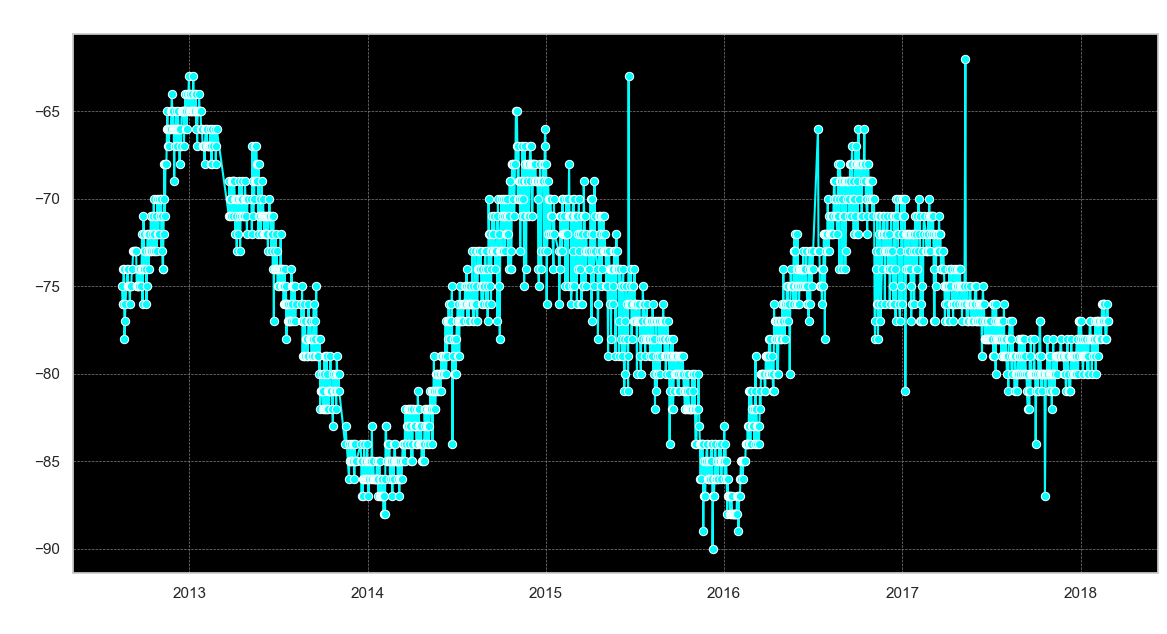

In [321]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Ensure 'terrestrial_date' is in datetime format

# Plotting
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Create the plot
ax = sns.lineplot(data=df, x='terrestrial_date', y='min_temp', marker='o', color='cyan')

# Customizing the plot
ax.set_title('Daily Minimum Temperature on Mars', fontsize=16, weight='bold', color='white')
ax.set_xlabel('Date', fontsize=14, color='white')
ax.set_ylabel('Minimum Temperature (°C)', fontsize=14, color='white')
ax.set_facecolor('black')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Show plot
plt.show()

#### Minimum Temperature

Coldest and Warmest Months on Mars:
On average, the third month experiences the coldest minimum temperatures on Mars, with temperatures reaching their lowest during this period. Conversely, the eighth month is the warmest, showing the highest minimum temperatures. Despite these variations, the temperatures on Mars remain extremely cold in human terms.

#### Atmospheric Pressure

Atmospheric Pressure Trends:
The atmospheric pressure on Mars shows notable variation throughout the Martian year. On average, pressure is at its lowest during the sixth month and reaches its peak in the ninth month. These fluctuations reflect the dynamic nature of the Martian atmosphere.

#### Year Length

By examining the plot, I estimated that a Martian year spans approximately 675 Earth days, based on the distance between temperature peaks. This estimate is quite close to the actual duration of a Martian year, which is around 687 Earth days. This comparison helps validate our visual and analytical approach to understanding Martian time.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [322]:
# Write the data to a CSV
mar_temperature_file = 'mars_temperature_data.csv'

# Write the DataFrame to a CSV file
df.to_csv(mar_temperature_file, index=False)

print(f"Data has been written to {mar_temperature_file}.")

Data has been written to mars_temperature_data.csv.


In [323]:
# Close
browser.quit()